# Qualifying results overview

Plot the qualifying result with visualization the fastest times.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta

import fastf1
import fastf1.plotting
from fastf1.core import Laps


# we only want support for timedelta plotting in this example
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

session = fastf1.get_session(2021, 'Spanish Grand Prix', 'Q')
session.load()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /Users/gakroppongi/Library/Caches/fastf1.
	Size: 1.51 GB
core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.0.3]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data 

First, we need to get an array of all drivers.



In [2]:
drivers = pd.unique(session.laps['Driver'])
print(drivers)

['HAM' 'VER' 'BOT' 'LEC' 'OCO' 'SAI' 'RIC' 'PER' 'NOR' 'ALO' 'STR' 'GAS'
 'VET' 'GIO' 'RUS' 'TSU' 'RAI' 'MSC' 'LAT' 'MAZ']


After that we'll get each drivers fastest lap, create a new laps object
from these laps, sort them by lap time and have pandas reindex them to
number them nicely by starting position.



In [3]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

The plot is nicer to look at and more easily understandable if we just plot
the time differences. Therefore we subtract the fastest lap time from all
other lap times.



In [4]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

We can take a quick look at the laps we have to check if everything
looks all right. For this, we'll just check the 'Driver', 'LapTime'
and 'LapTimeDelta' columns.



In [5]:
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     HAM 0 days 00:01:16.741000        0 days 00:00:00
1     VER 0 days 00:01:16.777000 0 days 00:00:00.036000
2     BOT 0 days 00:01:16.873000 0 days 00:00:00.132000
3     LEC 0 days 00:01:17.510000 0 days 00:00:00.769000
4     OCO 0 days 00:01:17.580000 0 days 00:00:00.839000
5     SAI 0 days 00:01:17.620000 0 days 00:00:00.879000
6     RIC 0 days 00:01:17.622000 0 days 00:00:00.881000
7     PER 0 days 00:01:17.701000 0 days 00:00:00.960000
8     STR 0 days 00:01:17.974000 0 days 00:00:01.233000
9     GAS 0 days 00:01:17.982000 0 days 00:00:01.241000
10    NOR 0 days 00:01:18.010000 0 days 00:00:01.269000
11    VET 0 days 00:01:18.079000 0 days 00:00:01.338000
12    ALO 0 days 00:01:18.147000 0 days 00:00:01.406000
13    GIO 0 days 00:01:18.356000 0 days 00:00:01.615000
14    TSU 0 days 00:01:18.556000 0 days 00:00:01.815000
15    RAI 0 days 00:01:18.917000 0 days 00:00:02.176000
16    MSC 0 days 00:01:19.117000 0 days 00:00:02

Finally, we'll create a list of team colors per lap to color our plot.



In [6]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

Now, we can plot all the data



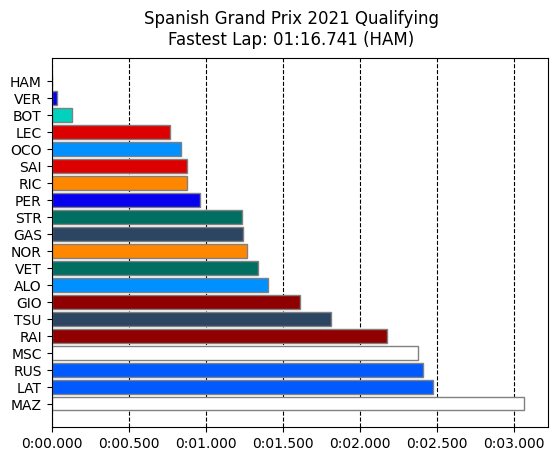

In [9]:
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()